In [1]:
%matplotlib notebook
%matplotlib notebook

import numba
import numpy as np

import kinematics
import constitutive
import solver
import visualization

In [17]:
#import auxiliary
import matplotlib.pyplot as plt

### Static cantilever

In [2]:
# define geometric properties of the rod
geometry = kinematics.Geometry(length=0.1, radius=5e-4)

# define material properties of the rod
material = constitutive.Material(geometry=geometry, elastic_modulus=200e9, shear_modulus=85e9)

# initialize the solver for the cantilever problem (fixed displacement and rotation at leftmost end)
cantilever = solver.Cantilever(geometry, material, number_of_elements=100)

# set the Neumann boundary condition at the rightmost end
cantilever.boundary_condition = np.array([0, 1, 0, 0, 0, 0])

In [3]:
centerline, load_step_iterations, residuals_norm_evolution, increments_norm_evolution = cantilever.run_simulation()

<IPython.core.display.Javascript object>


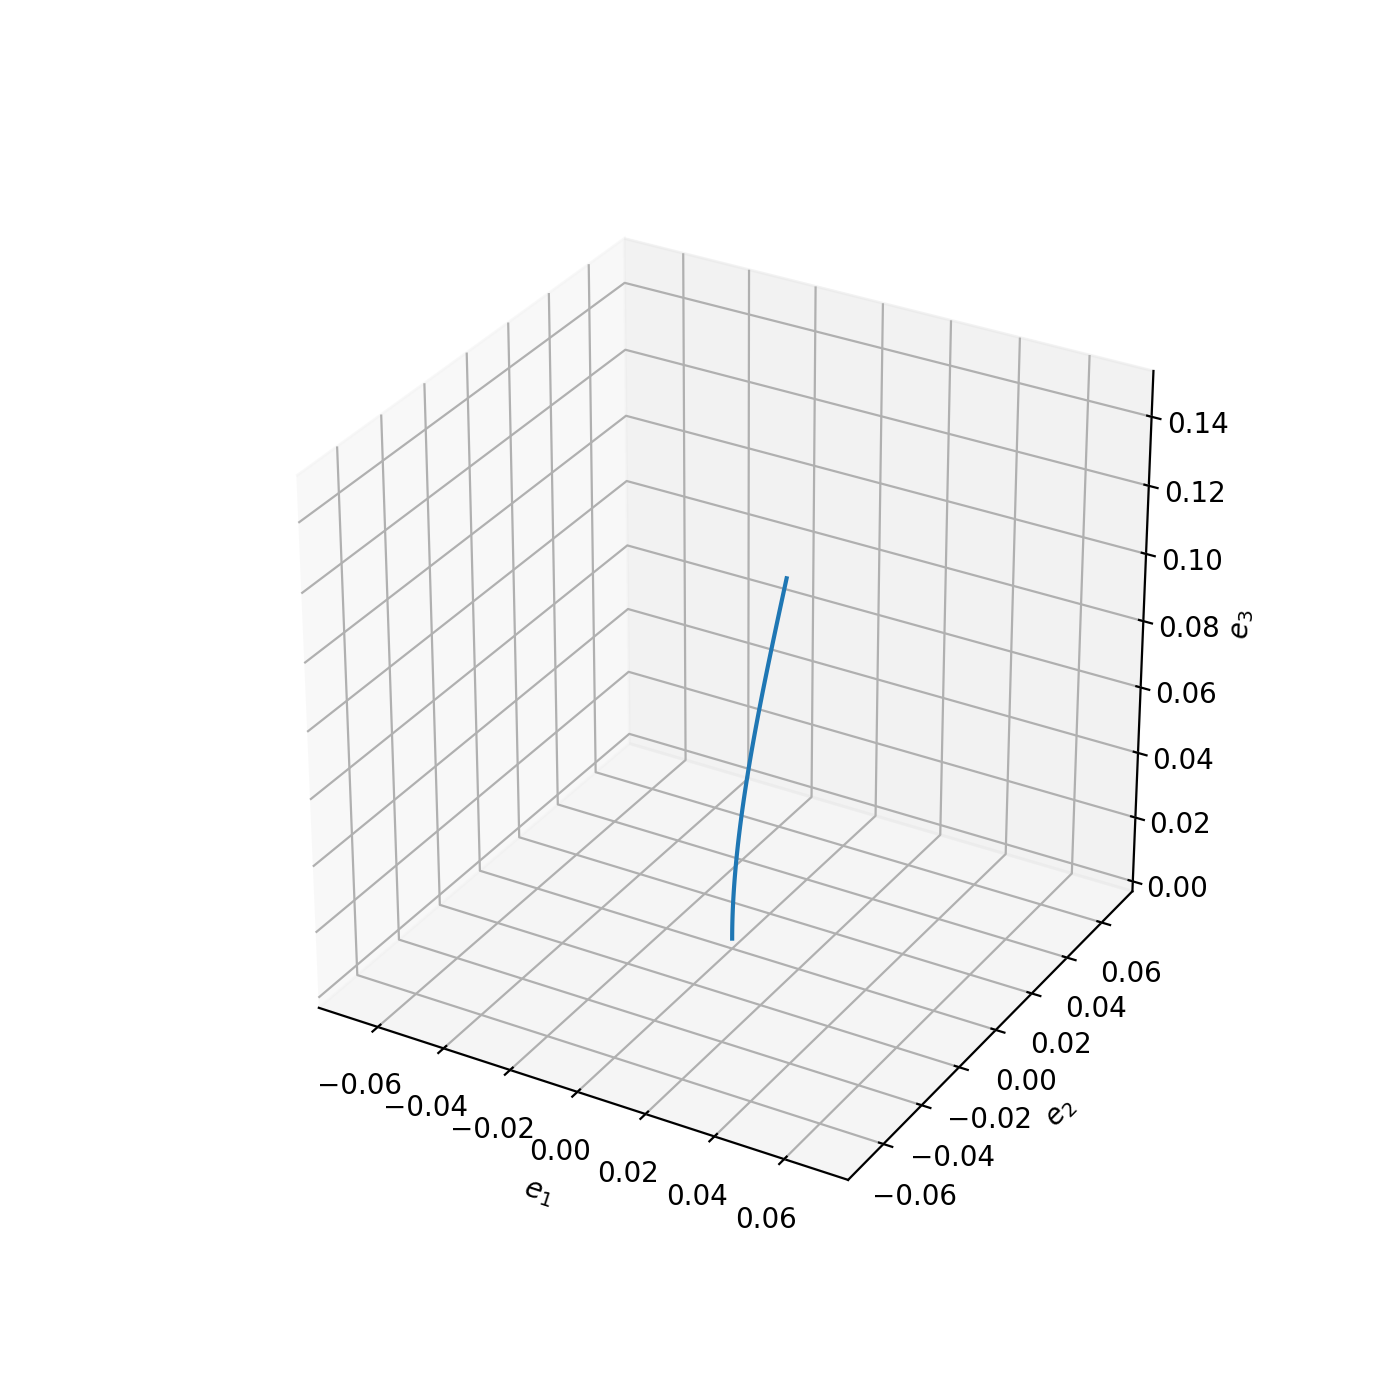

In [4]:
visualization.plot_centerline(centerline)

In [5]:
load_step_iterations

[1, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0]

In [25]:
def plot_convergence(residuals_norm_evolution=None, increments_norm_evolution=None, load_step=0):
    """
    Create a convergence plot.

    Parameters
    ----------
    residuals_norm_evolution
    increments_norm_evolution
    """
    assert residuals_norm_evolution[load_step] != []
    
    figure = plt.figure(figsize=(7, 7))
    axis = figure.add_subplot(111)
    
    # label axes
    axis.set_xlabel('iteration')
    axis.set_ylabel('norm of residuals')
    
    # plot
    axis.plot(residuals_norm_evolution[load_step])

<IPython.core.display.Javascript object>


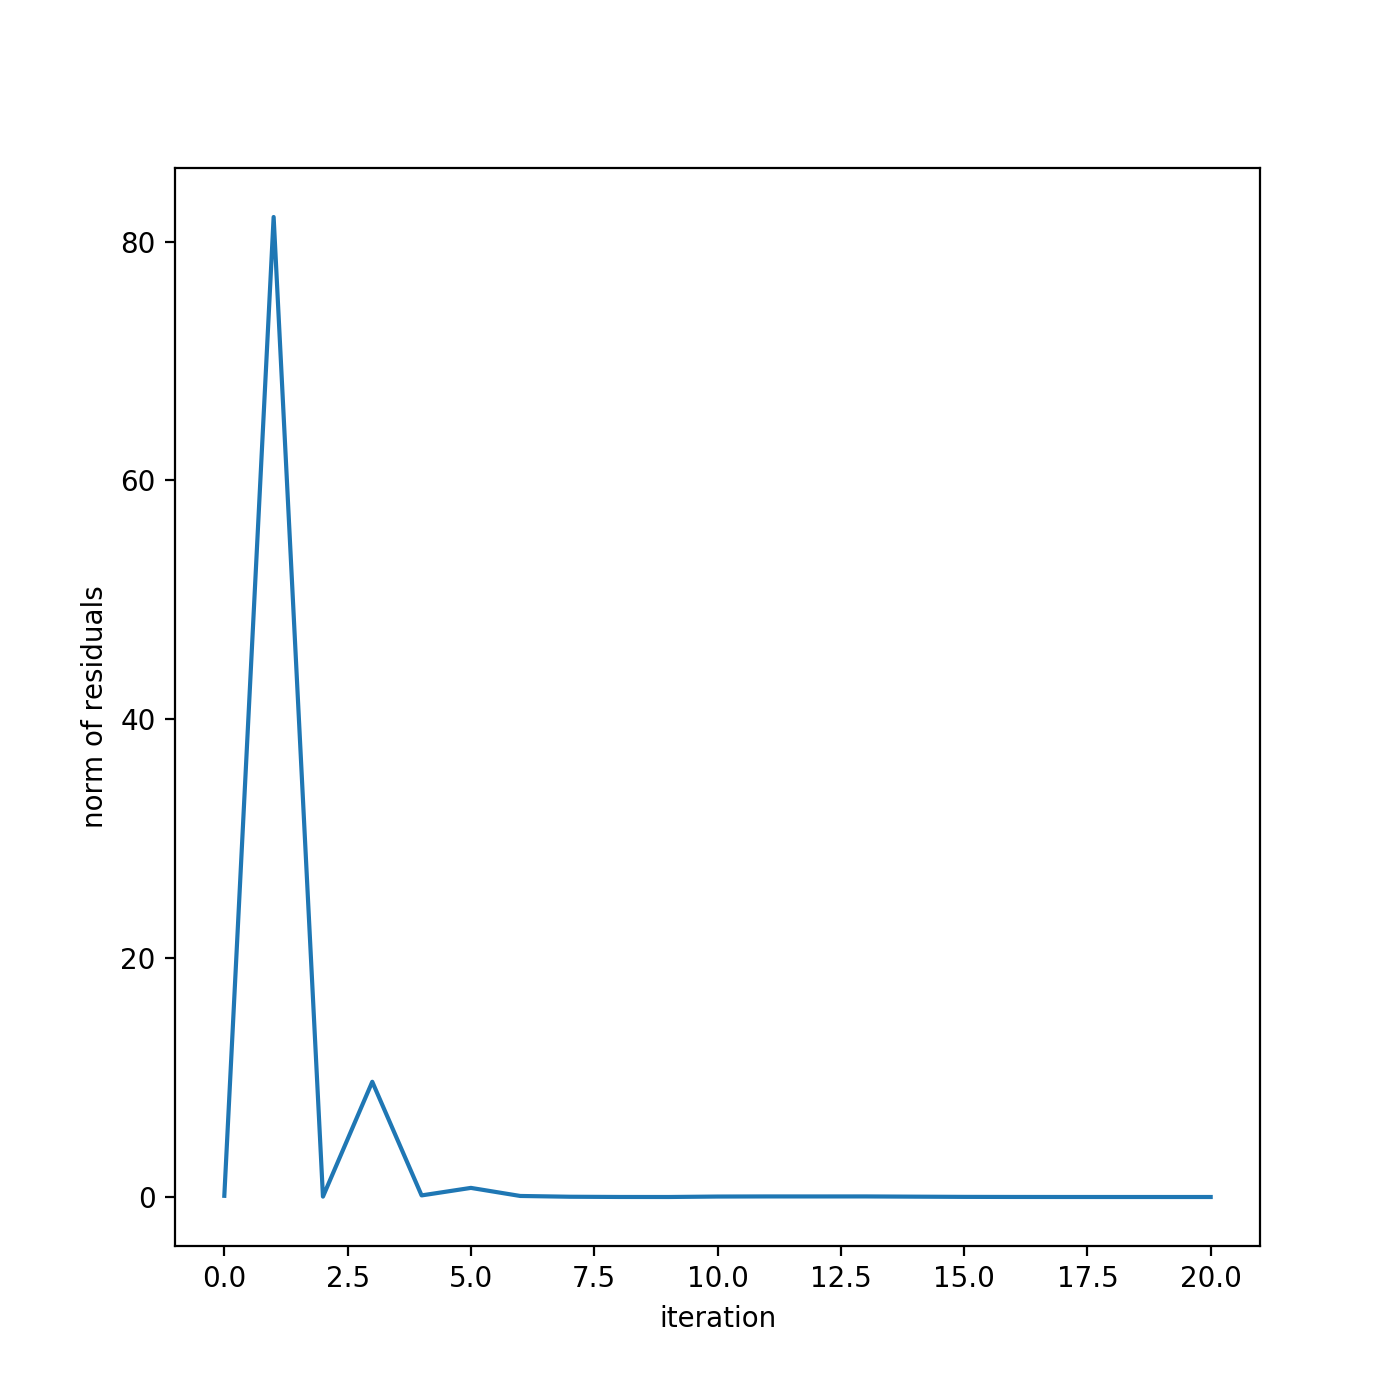

In [26]:
plot_convergence(residuals_norm_evolution)

## Sandbox ...

In [12]:
def test(a=None, b=None):
    print(a)
    print(b)